Наивный Байес. Классификация 1.
Теория:
 P(H|E) = (P(E|H) * P(H)) / P(E) 
Используется для классификатора с категор. данными, Применить эту теорему к любой проблеме, нам нужно вычислить два типа вероятностей, которые появляются в формуле.




In [131]:
from sklearn.model_selection import train_test_split #test regression
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Данные по сердечным приступам у разных людей

- Age : Age of the patient
- Sex : Sex of the patient
- exang : exercise induced angina (1 = yes; 0 = no)
- ca : number of major vessels (0-3)
-cp : Chest Pain type chest pain type
-trtbps : resting blood pressure (in mm Hg)
-chol : cholestoral in mg/dl fetched via BMI sensor
-fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
-rest_ecg : resting electrocardiographic results
-thalach : maximum heart rate achieved
-target : 0= less chance of heart attack 1= more chance of heart attack

In [132]:
data = pd.read_csv('heart (1).csv')

In [133]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
data.apply(lambda x: sum(x.isnull()), axis = 0) #nulls

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

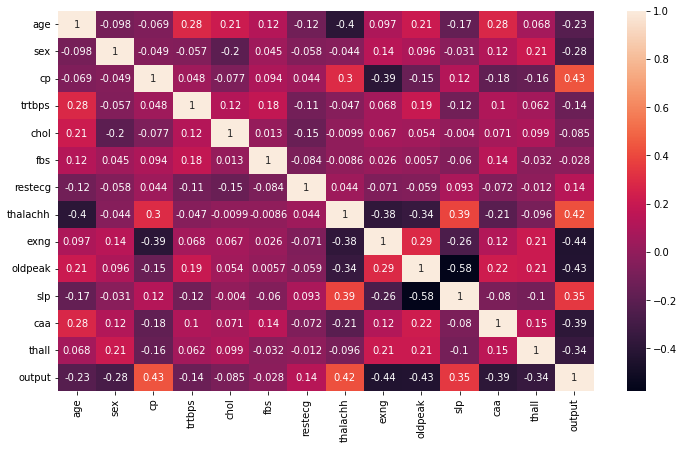

In [134]:
plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), annot = True)

In [208]:
print(data.corr().output.sort_values(ascending = False)[1:])

cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
trtbps     -0.091969
chol       -0.111442
sex        -0.280937
age        -0.286429
thall      -0.344029
caa        -0.391724
oldpeak    -0.401840
exng       -0.436757
Name: output, dtype: float64


In [135]:
# преобразуем возраст в 0/1 как граница медиана (по первичным данным возраст не сильно коррелирует с сер.болезнью)
data['age'] = np.where((data.age < data['age'].median()), 0, 1)

<AxesSubplot:>

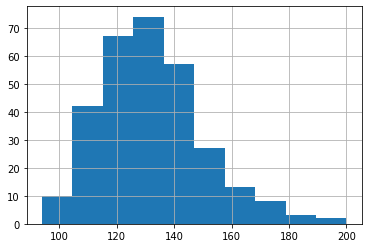

In [82]:
# давление и холестерин- отнесем его к 0 и 1 как повышенное и пониженное
data['trtbps'].hist()


In [136]:
data['trtbps'] = np.where((data.trtbps < data['trtbps'].mean()), 0, 1)
data['chol'] = np.where((data.chol < data['chol'].median()), 0, 1)

In [152]:
parametrs = ['thalachh','output']
X = data.drop(parametrs, axis = 1)
y = data['output']

In [153]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

In [155]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,exng,oldpeak,slp,caa,thall
158,1,1,1,0,0,0,1,0,0.4,1,4,3
46,0,1,2,1,0,0,0,0,0.0,2,0,2
131,0,0,1,1,1,0,1,0,0.0,1,0,2
172,1,1,1,0,1,0,0,0,1.8,1,0,2
71,0,1,2,0,0,0,1,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,0,3,1,1,1,0,0,1.0,2,0,2
146,0,0,2,0,1,0,1,0,0.3,1,1,2
84,0,0,0,0,1,0,0,0,0.6,1,0,2
300,1,1,0,1,0,1,1,0,3.4,1,2,3


In [222]:
model = GaussianNB()
y_predicted = model.fit(X_train, y_train).predict(X_test)
print(np.mean(y_predicted == y_test))

0.8360655737704918


In [157]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_predicted)) #confusion matrix 

[[21  6]
 [ 5 29]]


TN = 21, FN = 6, FP = 5, TP = 29

Переведем oldpeak в категориальную переменную и потестим еще раз:


In [163]:
data['oldpeak'] = np.where((data.oldpeak < data['oldpeak'].median()), 0, 1)
parametrs = ['thalachh','output']
X = data.drop(parametrs, axis = 1)
y = data['output']

In [195]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

In [218]:
model1 = GaussianNB()
y_predicted1 = model1.fit(X_train, y_train).predict(X_test)
print(np.mean(y_predicted1 == y_test))#accuracy #2% добавилось

0.8360655737704918


Наивный Байес работает с кат. дата

In [219]:
#confusion matrix 
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_predicted1)) 

[[22  5]
 [ 5 29]]


In [193]:
# cпасли еще одного больного который был ложнонегативный.TN = 21, FN = 5, FP = 5, TP = 29

In [220]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, plot_roc_curve
print('precision: ', precision_score(y_test, y_predicted1))
print('recall: ', recall_score(y_test, y_predicted1))
print(f'accuracy: {round(accuracy_score(y_test, y_predicted1)*100, 1)}%')

precision:  0.8529411764705882
recall:  0.8529411764705882
accuracy: 83.6%


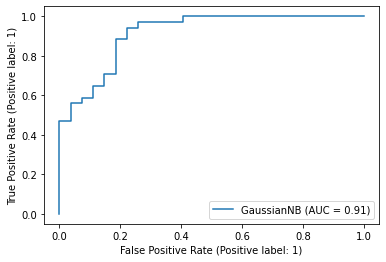

In [221]:
plot_roc_curve(model1, X_test, y_test)
plt.show()